In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian_PySCF(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
### HAMILTONIAN end

#####################################

QubitHamiltonian

(-0.32760818967480887+0j) [] +
(0.049197645871367594+0j) [X0 Z1 X2] +
(0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [Y0 Z1 Y2] +
(0.049197645871367594+0j) [Y0 Z1 Y2 Z3] +
(0.13716572937099492+0j) [Z0] +
(0.13716572937099492+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z0 Z2] +
(0.10622904490856086+0j) [Z0 Z2 Z3] +
(0.15660062488237958+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.16326768673564357+0j) [Z1 Z3] +
(-0.1303629205710914+0j) [Z2]

In [2]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
                                                                                                             double_cc_amplitudes=None, 
                                                                                                             singles_hamiltonian=None,
                                                                                                             doubles_hamiltonian=None, 
                                                                                                             tol_filter_small_terms = None)

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ops_ia,
                                                                                                                    Sec_Quant_CC_ops_ijab,
                                                                                                                   transformation='BK')


In [3]:
input_state = ansatz_obj.Get_BK_HF_state_in_OCC_basis()
print(input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
                                         Theta_param_list_ijab=theta_parameters_ijab,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

[1. 0. 0. 0.]


┌─────────┐   ┌──────────┐              ┌──────────┐
0: ───X───H──────────@───────────────────────@───H───────────Rx(0.5π)───@───────────────────────@───────────Rx(-0.5π)──────────────@───────────────────────@──────────H────────────────────@───────────────────@───────────H─────────────H───────────@───────────────────────@───────────H───Rx(0.5π)───@──────────────@───Rx(-0.5π)───Rx(0.5π)───@──────────────────────@───Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───Rx(0.5π)───@──────────────────────@───Rx(-0.5π)───H──────────@───────────────────────────────@───────────H──────────H───@───────────────────────@───H───────────
                     │                       │                          │                       │                                  │                       │                               │                   │                                     │                       │                          │              │                          │                      │                          │                              │                          │                      │                          │                               │                          │                       │
1: ───I───Rx(0.5π)───X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)───X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───X───@───────────────@───X──────────Rx(-0.5π)────Rx(0.5π)┼─────@─────────────┼───────────@─────────────Rx(-0.5π)───X───@───────────────@───X──────────────────────────┼──────────────┼──────────────────────────X───@──────────────@───X──────────────────────────X───@──────────────────────@───X──────────────────────────┼──────────────────────┼──────────────────────────X───@───────────────────────@───X──────────────────────────┼───────────────────────┼───────────────
                         │               │                                  │               │                                          │               │                                   │     │             │           │                             │               │                              │              │                              │              │                                  │                      │                              │                      │                              │                       │                              │                       │
2: ───I───H──────────────X───Rz(-0.0π)───X───H───Rx(0.5π)───────────────────X───Rz(-0.0π)───X───Rx(-0.5π)──────────────────────────────X───Rz(-0.0π)───X───Rx(0.5π)────────────────────────X─────┼Rz(-0.0π)────X───────────┼Rx(-0.5π)────Rx(0.5π)────────X───Rz(-0.0π)───X───Rx(-0.5π)───H──────────────X───Rz(0.0π)───X───H───────────H──────────────X───Rz(0.0π)───X───H───H──────────────────────────X───@──────────────@───X───H───H──────────────────────X───@──────────────@───X───H───────────Rx(0.5π)───────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)───────X───@───────────────@───X───Rx(-0.5π)───
                                                                                                                                                                                                 │                         │                                                                                                                                                                                │              │                                      │              │                                      │               │                                      │               │
3: ───I──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X─────────────Rz(0.0π)────X────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X───Rz(0.0π)───X────────

In [4]:
Qubit_Op_list_Second_Quant_CC_Ops_ijab

[0.125j [X0 Z1 Y2] +
 0.125j [X0 Z1 Y2 Z3] +
 0.125j [X0 Y2] +
 0.125j [X0 Y2 Z3] +
 -0.125j [Y0 Z1 X2] +
 -0.125j [Y0 Z1 X2 Z3] +
 -0.125j [Y0 X2] +
 -0.125j [Y0 X2 Z3]]

From Helgaker, T., P. Jorgensen,and J. Olsen (2014),Molecularelectronic-structure theory(John Wiley & Sons)
we known

$$H_{2}^{ground} = 0.9939| 1100\rangle - 0.1106| 0011\rangle$$

From group theory we know only double excitation terms are important!
We can see this from our ijab operators that qubits 1 and 3 are only acted on by $Z$ therefore experience no population changes... Can even see this from the answer if we write it in BK basis:

$$H_{2}^{BK} = 0.9939| 1000\rangle - 0.1106| 0010\rangle$$

See how qubits 1 and 3 always remain at 0!

therefore can **remove** these measurements from Hamiltonian... as we know what expectation values they should give!

In the case for this Hamiltonian only $I$ and $Z$ act on these qubits! So even easier to remove (expectation values = +1 (as act on $| 0\rangle$ state!), so just remove and add to relivent H terms!

LOOK at:

PHYS. REV. X, **8**, 031022 (2018)

In [5]:
print('double e- operators:')
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

indices_to_Remove = ansatz_obj.Find_Qubits_only_acted_on_by_I_or_Z(Qubit_Op_list_Second_Quant_CC_Ops_ijab)
print('')
print('qubit indices:', indices_to_Remove, 'only acted on by I or Z')

double e- operators:
[0.125j [X0 Z1 Y2] +
0.125j [X0 Z1 Y2 Z3] +
0.125j [X0 Y2] +
0.125j [X0 Y2 Z3] +
-0.125j [Y0 Z1 X2] +
-0.125j [Y0 Z1 X2 Z3] +
-0.125j [Y0 X2] +
-0.125j [Y0 X2 Z3]]

qubit indices: [1 3] only acted on by I or Z


In [6]:
list(QubitHamiltonian)

[(-0.32760818967480887+0j) [],
 (0.13716572937099492+0j) [Z0],
 (0.13716572937099492+0j) [Z0 Z1],
 (-0.1303629205710914+0j) [Z2],
 (-0.13036292057109136+0j) [Z1 Z2 Z3],
 (0.15660062488237958+0j) [Z1],
 (0.049197645871367594+0j) [Y0 Z1 Y2 Z3],
 (0.049197645871367594+0j) [X0 Z1 X2],
 (0.049197645871367594+0j) [X0 Z1 X2 Z3],
 (0.049197645871367594+0j) [Y0 Z1 Y2],
 (0.10622904490856086+0j) [Z0 Z2],
 (0.15542669077992843+0j) [Z0 Z1 Z2 Z3],
 (0.15542669077992843+0j) [Z0 Z1 Z2],
 (0.10622904490856086+0j) [Z0 Z2 Z3],
 (0.16326768673564357+0j) [Z1 Z3]]

### Can remove these terms from Hamiltonian

In [7]:
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(indices_to_Remove)
reduced_Qubit_Hamiltonian

(-0.007739878056785721+0j) [] +
(0.09839529174273519+0j) [X0 X2] +
(0.09839529174273519+0j) [Y0 Y2] +
(0.27433145874198983+0j) [Z0] +
(0.5233114713769786+0j) [Z0 Z2] +
(-0.2607258411421828+0j) [Z2]

### Can remove these terms from Anstz

In [8]:
reduced_ijab_CC = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
                                                             indices_to_Remove)
reduced_ijab_CC

[0.5j [X0 Y2] +
 -0.5j [Y0 X2]]

# NEXT need to re-label everything

In [9]:
relabel_dict, relabelled_reduced_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)

print('qubit relabelling dict = ', relabel_dict)

relabelled_reduced_Qubit_Hamiltonian

qubit relabelling dict =  {0: 0, 2: 1}


(-0.007739878056785721+0j) [] +
(0.09839529174273519+0j) [X0 X1] +
(0.09839529174273519+0j) [Y0 Y1] +
(0.27433145874198983+0j) [Z0] +
(0.5233114713769786+0j) [Z0 Z1] +
(-0.2607258411421828+0j) [Z1]

In [10]:
relabelled_reduced_ijab_CC = ansatz_obj.Re_label_CC_qubit_operators(relabel_dict, reduced_ijab_CC)
relabelled_reduced_ijab_CC

[0.5j [X0 Y1] +
 -0.5j [Y0 X1]]

## Find New input state

In [11]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())
print('BUT following indices removed:', indices_to_Remove)
ansatz_obj.New_BK_HF_state(indices_to_Remove)

old input =  [1. 0. 0. 0.]
BUT following indices removed: [1 3]


array([1., 0.])

# Find what new FCI energy is
- here should be the same as true answer!

In [12]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(relabelled_reduced_Qubit_Hamiltonian)


from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

new_FCI =  (-1.10115033023262+0j) VS old FCI: -1.101150330232619


In [13]:
from quchem.LCU_method import *

In [14]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(relabelled_reduced_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 3525.61it/s]


{0: [(0.5233114713769786+0j) [Z0 Z1]],
 1: [(-0.007739878056785721+0j) []],
 2: [(-0.2607258411421828+0j) [Z1], (0.09839529174273519+0j) [Y0 Y1]],
 3: [(0.27433145874198983+0j) [Z0], (0.09839529174273519+0j) [X0 X1]]}

In [15]:
# {0: [(0.5233114712917368+0j) [Z0 Z1]],
#  1: [(-0.007739878377473919+0j) []],
#  2: [(0.09839529175770566+0j) [X0 X1], (-0.2607258408801835+0j) [Z1]],
#  3: [(0.09839529175770566+0j) [Y0 Y1], (0.2743314586359204+0j) [Z0]]}

In [16]:
import random
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(relabelled_reduced_ijab_CC))]
theta_ijab_random_input

[3.544863344929827]

In [17]:
new_BK_state = ansatz_obj.New_BK_HF_state(indices_to_Remove)


UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     [], 
                                     relabelled_reduced_ijab_CC)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=None, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

0: ───X───H──────────@─────────────────@───H───────────Rx(0.5π)───@────────────────@───Rx(-0.5π)───
                     │                 │                          │                │
1: ───I───Rx(0.5π)───X───Rz(-1.128π)───X───Rx(-0.5π)───H──────────X───Rz(1.128π)───X───H───────────

In [18]:
SET_index = 3
N_index = 1


R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
###

full_Q_circuit = Full_Ansatz_and_Quantum_R_circuit(Pn,
                                                   R_corrected_Op_list,
                                                   R_corr_list,
                                                   ancilla_amplitudes,
                                                   Hamilt.molecule.n_qubits , 
                                                   UCCSD_ansatz_Q_Circ)
full_Q_circuit

0: ───X─────────────────H──────────@─────────────────@───H───────────Rx(0.5π)───@────────────────@───Rx(-0.5π)───(-0-1j)*Y0─────────────────────
                                   │                 │                          │                │               │
1: ───I─────────────────Rx(0.5π)───X───Rz(-1.128π)───X───Rx(-0.5π)───H──────────X───Rz(1.128π)───X───H───────────X1─────────────────────────────
                                                                                                                 │
4: ─── U = 0.698 rad ────────────────────────────────────────────────────────────────────────────────────────────@──────────── U = 0.698 rad ───

In [19]:
N_QUBITS = Hamilt.molecule.n_qubits - len(indices_to_Remove)

def GIVE_ENERGY_lin_alg(theta_ijab):
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=None, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)


    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict=None)#{2:1, 3:1}) 
    
    energy = VQE_exp_LCU_lin_alg.Calc_Energy()
    return energy.real

In [20]:
GIVE_ENERGY_lin_alg([3.92699083])

-0.7278419189940927

## Optimizing

In [21]:
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

0: Input_to_Funct: [3.36762018]: Output: -1.0983239470572392
1: Input_to_Funct: [3.27899859]: Output: -1.099433550503829
2: Input_to_Funct: [3.32330939]: Output: -1.1011158661512706
3: Input_to_Funct: [3.32330939]: Output: -1.1011158661512706
4: Input_to_Funct: [3.32330939]: Output: -1.1011158661512706
5: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
6: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
7: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
8: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
9: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
10: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
11: Input_to_Funct: [3.31777054]: Output: -1.1011503283190294
12: Input_to_Funct: [3.31781381]: Output: -1.1011503302265608
13: Input_to_Funct: [3.31781381]: Output: -1.1011503302265608
14: Input_to_Funct: [3.31781381]: Output: -1.1011503302265608
15: Input_to_Funct: [3.31781381]: Output: -1.1011503302265608
16: Input_to_Funct:

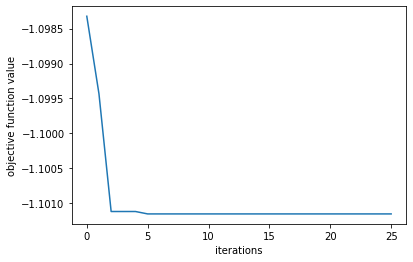

In [22]:
GG = Optimizer(GIVE_ENERGY_lin_alg,
                   [theta_ijab_random_input],
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-8, 
                   display_convergence_message=True,
                   display_steps=True)
GG.get_env(100)
GG.plot_convergence()
plt.show()

In [23]:
### optimizer

def calc_gradient_ADAM(theta_ijab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ijab_list):
        
        new_theta_list = theta_ijab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

0: Input_to_Funct: [3.44486335]: Output: -1.0828438807436875
1: Input_to_Funct: [3.34972119]: Output: -1.0999897423413574
2: Input_to_Funct: [3.26875346]: Output: -1.0984084264833844
3: Input_to_Funct: [3.21461]: Output: -1.0890496448564435
4: Input_to_Funct: [3.19212507]: Output: -1.0832331763565077
5: Input_to_Funct: [3.19572822]: Output: -1.084240705886197
6: Input_to_Funct: [3.21732296]: Output: -1.0896753746686942
7: Input_to_Funct: [3.24997958]: Output: -1.0959121275817654
8: Input_to_Funct: [3.28789125]: Output: -1.100129904623844
9: Input_to_Funct: [3.32574051]: Output: -1.1010786485439126
10: Input_to_Funct: [3.35855969]: Output: -1.0992581767956255
11: Input_to_Funct: [3.38230694]: Output: -1.0964140657878008
12: Input_to_Funct: [3.39470348]: Output: -1.0944223260862405
13: Input_to_Funct: [3.3955288]: Output: -1.0942774137762659
14: Input_to_Funct: [3.38619256]: Output: -1.0958271045625088
15: Input_to_Funct: [3.36908688]: Output: -1.0981551885182665
16: Input_to_Funct: [3.3

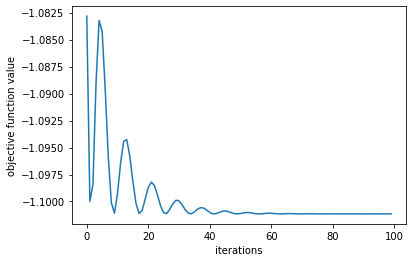

In [24]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   theta_ijab_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

# Reduced Ansatz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1}}$$

- when acting on $| 10 \rangle_{HF-BK-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

overall we get:

$\begin{aligned} U|01\rangle &=\left(\cos (\theta) I-i \sin (\theta) Y_{0} X_{1}\right)|10\rangle \\ &=\cos (\theta)|10\rangle-\sin (\theta)|11\rangle \end{aligned}$

- note $Y|1\rangle = -i|1\rangle$

to do this in Q.C the following circuit is employed:

In [25]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

0: ───X───Rx(0.5π)───@──────────────@───Rx(-0.5π)───
                     │              │
1: ───H──────────────X───Rz(0.2π)───X───H───────────

In [26]:
from quchem.latex_tables import *

In [27]:
latex_table_Hamiltonian(anti_commuting_sets, 'Latex_table1')
latex_table_seq_rot(anti_commuting_sets, 'Latex_table2', 0)
latex_table_LCU(anti_commuting_sets, 'Latex_table3', 0)
latex_table_LCU_R_op(anti_commuting_sets, 'Latex_table4', 0)

\begin{tabular}{rl}
\toprule
 l index &                                                        \$H\_\{S\_\{l\}\}\$ \\
\midrule
       0 &                                  [(0.5233114713769786+0j) [Z0 Z1]] \\
       1 &                                    [(-0.007739878056785721+0j) []] \\
       2 &  [(-0.2607258411421828+0j) [Z1], (0.09839529174273519+0j) [Y0 Y1]] \\
       3 &  [(0.27433145874198983+0j) [Z0], (0.09839529174273519+0j) [X0 X1]] \\
\bottomrule
\end{tabular}

\begin{tabular}{rrlll}
\toprule
 l index &        \$\textbackslash gamma\_\{l\}\$ &                                     \$rac\{H\_\{S\_\{l\}\}\}\{\textbackslash gamma\_\{l\}\}\$ & \$\textbackslash mathcal\{X\_\{nk\}\}\$ &             \$\textbackslash theta\_\{nk\}\}\$ \\
\midrule
       2 &  0.278675+0.000000j &  [(-0.9355920203881415+0j) [Z1], (0.3530829525565282+0j) [Y0 Y1]] &   [(1-0j) [Y0 X1]] &  [(2.7807284013302467+0j)] \\
       3 &  0.291444+0.000000j &   [(0.9412848367370243+0j) [Z0], (0.3376134714861852+0j

\begin{tabular}{rlrlll}
\toprule
 l index &                                                              \$R\$ &   l1 norm &                                                R real & phase correction &                         ancilla amplitudes \\
\midrule
       2 &  [(0.17945470126449523+0j) [], (-0-0.9837662375758129j) [Y0 X1]] &  1.163221 &  [0.39277724040480355 [], 0.9196336441322638 [Y0 X1]] &     [1, (-0-1j)] &  [0.39277724040480355, 0.9196336441322638] \\
       3 &        [(0.9852118647116022+0j) [], 0.1713405428714635j [Y0 X1]] &  1.156552 &    [0.922958466744709 [], 0.3848995565913995 [Y0 X1]] &          [1, 1j] &    [0.922958466744709, 0.3848995565913995] \\
\bottomrule
\end{tabular}



In [28]:
printt('old stuff below!')

NameError: name 'printt' is not defined

In [ ]:
Qubit_Hamiltonian_reduction = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

list_of_qubit_indices_to_remove = [1,3]

# manual removal
# list_of_correction_vals=[1,1]
# reduced_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Remove_indices_from_Hamiltonian_manual(list_of_qubit_indices_to_remove, list_of_correction_vals)
# reduced_Qubit_Hamiltonian

new_BK_state = Qubit_Hamiltonian_reduction.New_BK_HF_state(list_of_qubit_indices_to_remove)
print(new_BK_state)

reduced_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
reduced_Qubit_Hamiltonian

In [ ]:
qubit_re_label_dict, reduced_RE_LABELLED_Qubit_Hamiltonian = Qubit_Hamiltonian_reduction.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)
reduced_RE_LABELLED_Qubit_Hamiltonian

In [ ]:
def Find_Qubits_only_acted_on_by_I_or_Z(N_system_Qubits, qubit_operator_list):
    
    #qubit_operator_list is intended to be either list of ia_CC_terms or ijab_CC_terms
    
    
    # Generate list of qubits
    qubits_to_remove = np.arange(1,N_system_Qubits,1)
    
    for term in qubit_operator_list:
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
                # find where non I or Z terms are
                indices_to_remove = np.where(np.isin(PauliStrs, ['X','Y']) == True)[0]
                qubitNo_to_remove = np.take(qubitNos, indices_to_remove)
                
                i_remove = np.where(np.isin(qubits_to_remove, qubitNo_to_remove) == True)[0]
                qubits_to_remove = np.delete(qubits_to_remove, i_remove)
                
    return qubits_to_remove
    

In [ ]:
Find_Qubits_only_acted_on_by_I_or_Z(4,Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia

In [ ]:
Remove_Qubit_Terms(4, Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
x=np.array(['X','X','Z', 'Y','Y'])
np.where( x== 1 or x==3)

In [ ]:
np.isin(x, ['X','Y'])

# New FCI energy

In [ ]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(reduced_RE_LABELLED_Qubit_Hamiltonian)


from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

In [ ]:
def Remove_Qubit_Terms(indicies_removed, qubit_operators_list, qubit_relabel_dict):
    
    # This ignores any qubit operators that contain any overlap with indicies_removed
    
    from openfermion.ops import QubitOperator
    
    new_operator_list=[]
    for term in qubit_operators_list:
        new_qubitOp_term = QubitOperator()
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
                if np.isin(qubitNos, indicies_removed).any():
                    continue
                else:
                    indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                    qubitNo_reduced = np.delete(qubitNos, indices_to_remove)
                    
                    qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                    new_PauliStrs = np.delete(PauliStrs, indices_to_remove)
                    
                    new_qubit_op = list(zip(qubitNo_relabelled, new_PauliStrs.tolist()))
                    
                    if qubitNo_relabelled:
                        new_qubitOp_term+=QubitOperator(new_qubit_op, const)

        if new_qubitOp_term !=  QubitOperator():
            new_operator_list.append(new_qubitOp_term)
    return new_operator_list
    

In [ ]:
def Remove_Qubit_Terms(indicies_removed, qubit_operators_list, qubit_relabel_dict):
    
    # This ignores any qubit operators that contain any overlap with indicies_removed
    
    from openfermion.ops import QubitOperator
    
    new_operator_list=[]
    for term in qubit_operators_list:
        new_qubitOp_term = QubitOperator()
        for op in term:
            for PauliWord, const in op.terms.items():
                qubitNos, PauliStrs = list(zip(*PauliWord))
                
#                 if np.isin(qubitNos, indicies_removed).any():
#                     continue
#                 else:
                indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                qubitNo_reduced = np.delete(qubitNos, indices_to_remove)

                qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                new_PauliStrs = np.delete(PauliStrs, indices_to_remove)

                new_qubit_op = list(zip(qubitNo_relabelled, new_PauliStrs.tolist()))

#                 if qubitNo_relabelled:
                new_qubitOp_term+=QubitOperator(new_qubit_op, const)

        if new_qubitOp_term !=  QubitOperator():
            new_operator_list.append(new_qubitOp_term)
    return new_operator_list
    

In [ ]:
Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ijab, {0:0, 2:1})

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia

In [ ]:
Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ia, {0:0, 2:1})

In [ ]:
new_reduced_CC_ia = Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ia, {0:0, 2:1})
reduced_RE_LABELLED_CC_ijab =  Remove_Qubit_Terms([1,3], Qubit_Op_list_Second_Quant_CC_Ops_ijab, {0:0, 2:1})

In [ ]:
test = BK_Qubit_Reduction(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

t = test.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
t
qubit_re_label_dict, rr = test.Re_label_Hamiltonian(t)
rr

In [ ]:
test = BK_Qubit_Reduction(Qubit_Op_list_Second_Quant_CC_Ops_ia,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

t = test.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
t
qubit_re_label_dict, rr = test.Re_label_Hamiltonian(t)
rr

In [ ]:
reduced_CC_ijab = Qubit_Hamiltonian_reduction.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab, list_of_qubit_indices_to_remove)

print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

print('removing:', list_of_qubit_indices_to_remove, 'therefore becomes:')

reduced_CC_ijab

In [ ]:
reduced_RE_LABELLED_CC_ijab = Qubit_Hamiltonian_reduction.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ijab)
reduced_RE_LABELLED_CC_ijab

In [ ]:
reduced_CC_ia = Qubit_Hamiltonian_reduction.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ia, list_of_qubit_indices_to_remove)

print(Qubit_Op_list_Second_Quant_CC_Ops_ia)

print('removing:', list_of_qubit_indices_to_remove, 'therefore becomes:')

reduced_CC_ia

In [ ]:
reduced_RE_LABELLED_CC_ia = Qubit_Hamiltonian_reduction.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ia)
reduced_RE_LABELLED_CC_ia

In [ ]:
from scipy.linalg import expm

expm(-1j*1/2*np.eye(2))

In [ ]:
Z = np.array([[1,0],[0,-1]])

Z.transpose().conj().dot(expm(-1j*1/2*np.eye(2)).dot(Z))

In [ ]:
H=cirq.H._unitary_()
X=cirq.X._unitary_()
H.dot(X.dot(H))

In [ ]:
I=cirq.I._unitary_()
Z=cirq.Z._unitary_()
X.dot((-1*Z).dot(X))

In [ ]:
Z.dot(np.eye(2).dot(Z))

In [ ]:
cirq.H._unitary_().dot(expm(-1j*1/2*np.array([[0,1],[1,0]])).dot(cirq.H._unitary_()))


In [ ]:
# Remove Identity term!
new_reduced_CC_ia= QubitOperator()
for op in reduced_RE_LABELLED_CC_ia:
    for PauliWord, Const in op.terms.items():
        if len(PauliWord)>0:
            new_reduced_CC_ia+=QubitOperator(PauliWord, Const)
        else:
            new_reduced_CC_ia+=QubitOperator('Z0 Z1', Const)
new_reduced_CC_ia = list(new_reduced_CC_ia)
new_reduced_CC_ia

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_CC_ijab))]

In [ ]:
print(new_BK_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     new_reduced_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
x = [0,1,2,500,3]
y=[1,500]

list(set(x).intersection(y))

In [ ]:
print(Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab)

In [ ]:
list_of_qubit_indices_to_remove=[1]

for i in Sec_Quant_CC_ops_ia[1]:
    for C_A_op, const in i.terms.items():
        qubitNos, Crea_Annih = list(zip(*C_A_op))
        indices_to_remove = np.where(np.isin(qubitNos, list_of_qubit_indices_to_remove) == True)[0]
        new_qubitNos = np.delete(qubitNos, indices_to_remove)
        new_Crea_Annih =   np.delete(Crea_Annih, indices_to_remove)
        
        new_fermi_op = list(zip(new_qubitNos.tolist(), new_Crea_Annih.tolist()))
        
        print(FermionOperator(new_fermi_op, const))
        
        

In [ ]:
def Remove_fermionic_terms(indicies_removed, fermionic_operators_list, qubit_relabel_dict):
    from openfermion.ops import FermionOperator
    
    new_operator_list=[]
    for term in fermionic_operators_list:
        new_fermi_term = FermionOperator()
        for op in term:
            for C_A_op, const in op.terms.items():
                qubitNos, Crea_Annih = list(zip(*C_A_op))
                indices_to_remove = np.where(np.isin(qubitNos, indicies_removed) == True)[0]
                
                qubitNo_reduced = np.delete(qubitNos, indices_to_remove)
                qubitNo_relabelled = [qubit_relabel_dict[qNo] for qNo in qubitNo_reduced]
                
                new_Crea_Annih = np.delete(Crea_Annih, indices_to_remove)
            
                new_fermi_op = list(zip(qubitNo_relabelled, new_Crea_Annih.tolist()))
                
            if qubitNo_relabelled:
                new_fermi_term+=FermionOperator(new_fermi_op, const)
        if new_fermi_term !=  FermionOperator():
            new_operator_list.append(new_fermi_term)
    return new_operator_list
    

In [ ]:
Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ia, {0:0, 2:1})

In [ ]:
# CC_ia_ops = Remove_fermionic_terms([1], Sec_Quant_CC_ops_ia, {0:0, 2:1, 3:2})
# CC_ijab_ops = Remove_fermionic_terms([1], Sec_Quant_CC_ops_ijab, {0:0, 2:1, 3:2})
# print(CC_ia_ops, CC_ijab_ops)

In [ ]:
CC_ia_ops = Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ia, {0:0, 2:1})
CC_ijab_ops = Remove_fermionic_terms([1,3], Sec_Quant_CC_ops_ijab, {0:0, 2:1})
print(CC_ia_ops, CC_ijab_ops)

In [ ]:
CC_ia_ops[0]==CC_ijab_ops[0]

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(CC_ia_ops,
                                                                                                                    CC_ijab_ops,
                                                                                                                   transformation='BK')
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
def new_ia_ijab_terms(n_orbitals, n_electrons, qubits_indices_KEPT, qubit_relabel_dict):
    from openfermion.ops import FermionOperator

    orbitals_index = range(0, n_orbitals)
    alph_occs = list(set([k for k in orbitals_index if k % 2 == 0 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin up occupied
    beta_occs = list(set([k for k in orbitals_index if k % 2 == 1 and k < n_electrons]).intersection(qubits_indices_KEPT)) # spin down UN-occupied
    alph_noccs = list(set([k for k in orbitals_index if k % 2 == 0 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin down occupied
    beta_noccs = list(set([k for k in orbitals_index if k % 2 == 1 and k >= n_electrons]).intersection(qubits_indices_KEPT)) # spin up UN-occupied
        
    alph_occs=[qubit_relabel_dict[q_index] for q_index in alph_occs]
    beta_occs=[qubit_relabel_dict[q_index] for q_index in beta_occs]
    alph_noccs=[qubit_relabel_dict[q_index] for q_index in alph_noccs]
    beta_noccs=[qubit_relabel_dict[q_index] for q_index in beta_noccs]
    
    tol_filter_small_terms=None
    singles_hamiltonian=None
    doubles_hamiltonian=None
    double_cc_amplitudes=None
    single_cc_amplitudes=None

    Sec_Quant_CC_ia_ops = [] # second quantised single e- CC operators
    theta_parameters_ia = []
    Sec_Quant_CC_ijab_ops =[] # second quantised two e- CC operators
    theta_parameters_ijab =[]


    # SINGLE electron excitation: spin UP transition
    for i in alph_occs:
        for a in alph_noccs:
            if tol_filter_small_terms:
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # SINGLE electron excitation: spin DOWN transition
    for i in beta_occs:
        for a in beta_noccs:
            if tol_filter_small_terms:
                # uses Hamiltonian to ignore small terms!
                if abs(singles_hamiltonian[i][a]) > tol_filter_small_terms or abs(singles_hamiltonian[a][i]) > tol_filter_small_terms:
                    one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                    if single_cc_amplitudes is not None:
                        theta_parameters_ia.append(single_cc_amplitudes[a][i])
                    else:
                        theta_parameters_ia.append(0)

                    Sec_Quant_CC_ia_ops.append(one_elec)
            else:
                # NO filtering
                one_elec = FermionOperator(((a, 1), (i, 0))) - FermionOperator(((i, 1), (a, 0)))
                if single_cc_amplitudes is not None:
                    theta_parameters_ia.append(single_cc_amplitudes[a][i])
                else:
                    theta_parameters_ia.append(0)

                Sec_Quant_CC_ia_ops.append(one_elec)

    # DOUBLE excitation: UP + UP
    for i in alph_occs:
        for j in [k for k in alph_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in alph_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[b][a][j][i])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: DOWN + DOWN
    for i in beta_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in beta_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    # DOUBLE excitation: up + DOWN
    for i in alph_occs:
        for j in [k for k in beta_occs if k > i]:
            for a in alph_noccs:
                for b in [k for k in beta_noccs if k > a]:

                    if tol_filter_small_terms:
                        # uses Hamiltonian to ignore small terms!
                        if abs(doubles_hamiltonian[j][i][a][b]) > tol_filter_small_terms or abs(doubles_hamiltonian[b][a][i][j]) > tol_filter_small_terms:
                            two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                       FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))
                            if double_cc_amplitudes is not None:
                                theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                            else:
                                theta_parameters_ijab.append(0)
                        Sec_Quant_CC_ijab_ops.append(two_elec)
                    else:
                        # NO filtering
                        two_elec = FermionOperator(((b, 1), (a, 1), (j, 0), (i, 0))) - \
                                   FermionOperator(((i, 1), (j, 1), (a, 0), (b, 0)))

                        if double_cc_amplitudes is not None:
                            theta_parameters_ijab.append(double_cc_amplitudes[a][i][b][j])
                        else:
                            theta_parameters_ijab.append(0)

                        Sec_Quant_CC_ijab_ops.append(two_elec)

    return Sec_Quant_CC_ia_ops, Sec_Quant_CC_ijab_ops, theta_parameters_ia, theta_parameters_ijab

In [ ]:
CC_ia_ops, CC_ijab_ops, theta_ia, theta_ijab= new_ia_ijab_terms(4,2,[0,2],{0:0, 2:1})
print(CC_ia_ops, CC_ijab_ops, theta_ia, theta_ijab)

In [ ]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(CC_ia_ops,
                                                                                                                    CC_ijab_ops,
                                                                                                                   transformation='BK')
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:


from openfermion.transforms import bravyi_kitaev
Op1 = FermionOperator(((1, 1), (0, 0)), 1)
Op2 = FermionOperator(((0, 1), (1, 0)), 1)
print(Op1,Op2)

overall_Op =  Op2 - Op1

bravyi_kitaev(overall_Op)
# bravyi_kitaev(Op1)

# Ansatz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1}}$$

- when acting on $| 10 \rangle_{HF-BK-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

overall we get:

$\begin{aligned} U|01\rangle &=\left(\cos (\theta) I-i \sin (\theta) Y_{0} X_{1}\right)|10\rangle \\ &=\cos (\theta)|10\rangle-\sin (\theta)|11\rangle \end{aligned}$

- note $Y|1\rangle = -i|1\rangle$

to do this in Q.C the following circuit is employed:

In [ ]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

# Running Example

In [ ]:
from quchem.LCU_method import *

In [ ]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(reduced_RE_LABELLED_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

In [ ]:
print(Qubit_Op_list_Second_Quant_CC_Ops_ia)
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

In [ ]:
print(new_reduced_CC_ia)
print(reduced_RE_LABELLED_CC_ijab)

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]


In [ ]:
print(new_BK_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(new_BK_state,
                                     new_reduced_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

UCCSD_ansatz_Q_Circ = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

In [ ]:
# input_state = ansatz_obj.Get_BK_HF_state_in_OCC_basis()
# print(input_state)

# UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ia, 
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ijab)

# UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
#                                          Theta_param_list_ijab=theta_parameters_ijab,
#                                          ia_first=True)
# UCCSD_ansatz_Q_Circ

# N_QUBITS=4
# def GIVE_ENERGY_lin_alg(theta_ia_ijab):
    
#     theta_ia= theta_ia_ijab[:(len(Qubit_Op_list_Second_Quant_CC_Ops_ia))]
#     theta_ijab=theta_ia_ijab[(len(Qubit_Op_list_Second_Quant_CC_Ops_ia)):]
   
#     ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
#                                         Theta_param_list_ia=theta_ia, 
#                                          Theta_param_list_ijab=theta_ijab,
#                                          ia_first=True)

#     VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
#                  ansatz_cirq_circuit,
#                  N_QUBITS,                     # <--- NOTE THIS
#                  N_indices_dict=None) 
    
#     return VQE_exp_LCU_lin_alg.Calc_Energy().real

In [ ]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)

def GIVE_ENERGY_lin_alg(theta_ia_ijab):
    
    theta_ia= theta_ia_ijab[:len(new_reduced_CC_ia)]
    theta_ijab=theta_ia_ijab[len(new_reduced_CC_ia):]
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    
    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict=None) 
    
    return VQE_exp_LCU_lin_alg.Calc_Energy().real

In [ ]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(new_reduced_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]

theta_combined_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

In [ ]:
GIVE_ENERGY_lin_alg(theta_combined_random_input)

In [ ]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

In [ ]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [ ]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   theta_combined_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

In [ ]:
Hamilt.molecule.fci_energy

In [ ]:
from quchem.Adam_Optimizer import *

In [ ]:
def calc_gradient_ADAM(THETA):      

    Obs_PLUS = VQE_experiment_ENERGY(THETA + np.pi/4)
    Obs_MINUS = VQE_experiment_ENERGY(THETA - np.pi/4)
    
    gradient = Obs_PLUS - Obs_MINUS
        
    return gradient

In [ ]:
X0 = random.uniform(0, 2*np.pi)

opt_params, list_of_inputs, list_of_outputs = Adam_Opt(X0, VQE_experiment_ENERGY,
                                                       calc_gradient_ADAM, 
                                                       learning_rate=0.05, 
                                                       beta_1=0.9, 
                                                       beta_2=0.999, 
                                                       epsilon=1e-8,
                                                       max_iter=50,
                                                       disp=True,
                                                       tolerance=1e-3,
                                                       store_steps=True)

VQE_experiment_ENERGY(opt_params)

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline
plt.figure()
plt.plot(list_of_outputs)
plt.xlabel('iterations')
plt.ylabel('objective function value')
plt.show()